###  ADDIS ABABA UNIVERSITY 
    
###  ADDIS ABABA INSTITUTE OF TECHNOLOGY
    
####  SCHOOL OF INFORMATION TECHNOLOGY AND ENGINEERING – SITE
    
####  Department of MSC in Artificial Intelligence                                           



### Course Assignment     `Assignment 2`   
>>###### Course:  Reinforcement Learning
>>###### Name:    Mintesnot Fikir
>>###### Section: Regular 
>>###### IDs:   GSR1669/15   
>>###### Submitted to: Natnael A. (PhD)
>>###### Submission date: Nov 2023

Reference for  I have used https://www.theaidream.com/post/multi-armed-bandit-problem

Epsilon-Greedy Implementation
UCB (Upper Confidence Bound) Algorithm
Thompson Sampling for Bernoulli Bandits

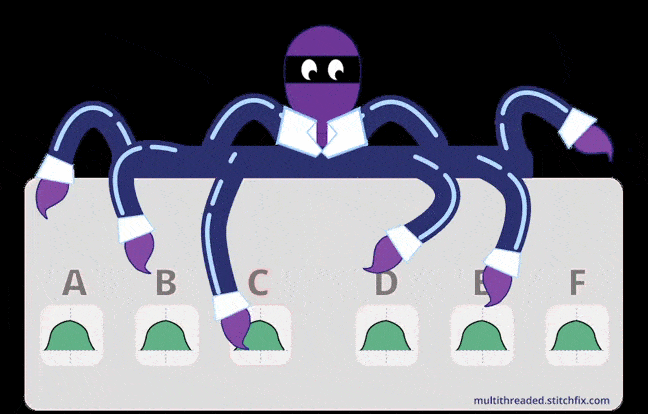

Program the corresponding solution for each of the following exploration-exploitation problems. Write a clear script (using any HLL) and support each solution with experiment analysis.
It is individual responsibility. 
Due is Nov 26, 2023
### 1. Epsilon-Greedy Implementation:

Implement a simple epsilon-greedy algorithm for a multi-armed bandit problem. Create a function that takes in the number of arms, the true reward distribution for each arm, and the number of steps to run the algorithm. The function should output the total reward obtained over the steps. 
Experiment with different epsilon values and conclude your analysis of the algorithm by observing how it affects the balance between exploration and exploitation.




In [12]:
#Re-importing libraries and redefining the updated function with shorter variable names
import matplotlib.pyplot as plt
import numpy as np

def eps_greedy(n_arms, rewards, n_steps, eps):
#      Epsilon-greedy algorithm implementation for a multi-armed bandit problem.
#     :param n_arms: Number of arms in the bandit.
#     :param rewards: List of true rewards for each arm.
#     :param n_steps: Number of steps to run the algorithm.
#     :param eps: Probability of exploration.
#     :return: A list of cumulative rewards at each step.
    
    est_rewards = np.zeros(n_arms)
    counts = np.zeros(n_arms)
    cum_rewards = np.zeros(n_steps)
    total = 0

    for s in range(n_steps):
        if np.random.rand() < eps:
            # Exploration: choose a random arm
            chosen = np.random.randint(0, n_arms)
        else:
            # Exploitation: choose the best estimated arm
            chosen = np.argmax(est_rewards)

        # Simulate pulling the chosen arm
        reward = np.random.normal(rewards[chosen], 1)
        total += reward
        cum_rewards[s] = total

        # Update the estimated rewards
        counts[chosen] += 1
        est_rewards[chosen] += (reward - est_rewards[chosen]) / counts[chosen]

    return cum_rewards

# Experiment parameters with shorter names
n_arms = 5
rewards = np.random.normal(0, 1, n_arms)
n_steps = 1000
eps_values = [0.01, 0.1, 0.2, 0.5]

# Running the experiments for different epsilon values
res = {}
for eps in eps_values:
    cum_rewards = eps_greedy(n_arms, rewards, n_steps, eps)
    res[eps] = cum_rewards

# Plotting the results with shorter variable names
plt.figure(figsize=(12, 8))
for eps, rewards in res.items():
    plt.plot(rewards, label=f'Epsilon = {eps}')

plt.title("Epsilon-Greedy Algorithm: Steps vs Cumulative Reward")
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.show()

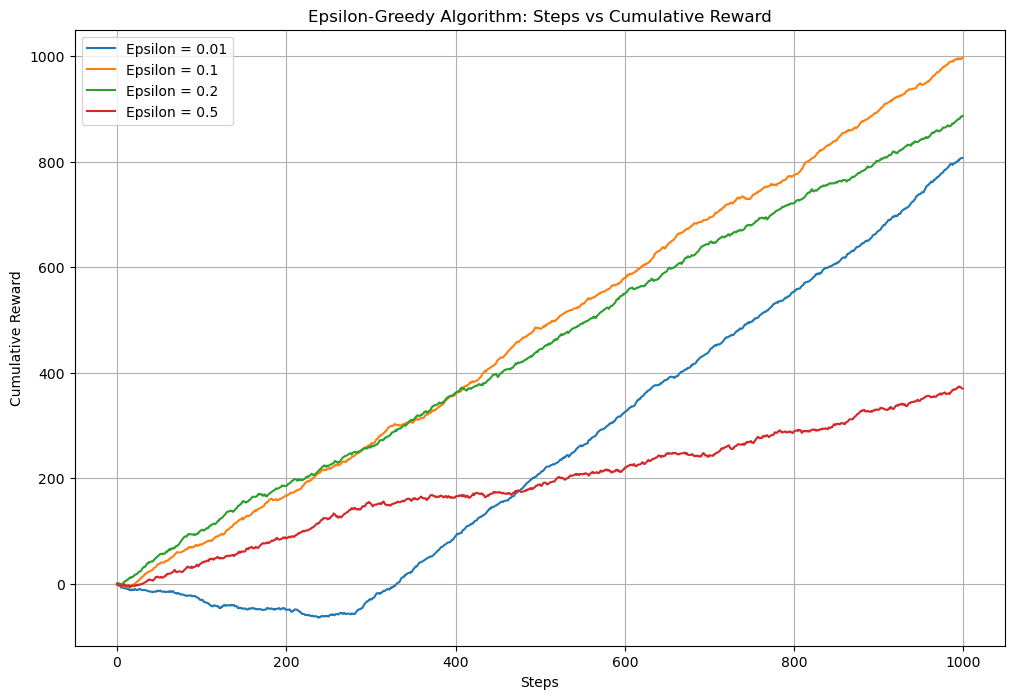

In [26]:
results

{0.01: array([  1.23503493,   1.08458919,   1.1538833 ,   2.90351674,
          4.13322012,   3.66936323,   4.44703533,   6.63025299,
          7.4496762 ,   8.63972676,   8.56910056,   9.50993106,
         11.75665943,  13.0334477 ,  13.98124298,  14.35473985,
         13.5589649 ,  15.11371364,  14.84355047,  13.61447478,
         15.86932426,  17.34265041,  19.0355029 ,  19.83593972,
         21.42301465,  22.30915097,  25.02357486,  25.26228772,
         25.80480765,  27.00882389,  27.36277755,  28.78399405,
         28.57485553,  30.47666186,  32.62765573,  32.42058564,
         33.81329768,  35.71325156,  36.57590804,  36.36952137,
         36.74605401,  37.81575027,  38.89724711,  38.35990885,
         38.56819969,  39.47846999,  39.69873134,  39.88278902,
         39.79673003,  42.99415663,  43.66092346,  44.35227824,
         45.9355315 ,  47.37509283,  48.38223449,  50.30123747,
         50.24566291,  50.47241269,  50.75467362,  50.96754469,
         52.49550703,  53.25577491

The graph showcases the behavior of the epsilon-greedy algorithm with different exploration rates over 1000 steps. Each epsilon value represents a different strategy in terms of balancing exploration (trying new options) and exploitation (choosing the best-known option).

`For epsilon = 0.01`, the line starts below zero, indicating an initial selection of suboptimal choices. However, around step 290, the cumulative reward becomes positive, and from there, it continues to climb steadily to a final reward value of approximately 800. This illustrates that after some initial exploration, the algorithm largely exploited what it initially found to be the best option, leading to a gradual increase in reward as it became more confident in its choices.

`With epsilon = 0.1`, the line shows a different pattern, starting around zero and then consistently increasing to a final reward value of about 1000. This higher epsilon value implies that the algorithm was more willing to explore different options, but it still managed to exploit the better-performing options enough to achieve a steady increase in cumulative reward.

`For epsilon = 0.2`, the cumulative reward also increases steadily but ends slightly lower than the 0.1 epsilon, at a reward value of around 900. This indicates that while the increased exploration did find good options, it may have also spent more time on less optimal choices, leading to a slightly lower final reward.

`Lastly, epsilon = 0.5` represents a strategy with a high level of exploration. The cumulative reward for this line increases more slowly and ends at a value of about 400. This lower final reward compared to the others suggests that frequent exploration led to less time spent exploiting the best options, resulting in a reduced overall gain.

The graph visually conveys how the level of exploration affects the cumulative reward over time. A very low level of exploration (epsilon = 0.01) can lead to initial stagnation but eventual steady gain, while moderate exploration (epsilon = 0.1 and 0.2) tends to offer a more consistent and higher overall reward. In contrast, a high exploration rate (epsilon = 0.5) may hinder the ability to capitalize on the best options, as seen by the lower final reward.

### 2. UCB (Upper Confidence Bound) Algorithm
Implement the UCB algorithm for a multi-armed bandit problem. Create a function that takes in the number of arms, the true reward distribution for each arm, and the number of steps to run the algorithm. The function should output the total reward obtained over the steps. 
Experiment with different exploration parameters and compare the performance of UCB with epsilon-greedy. I need analysis section for this experiment too.

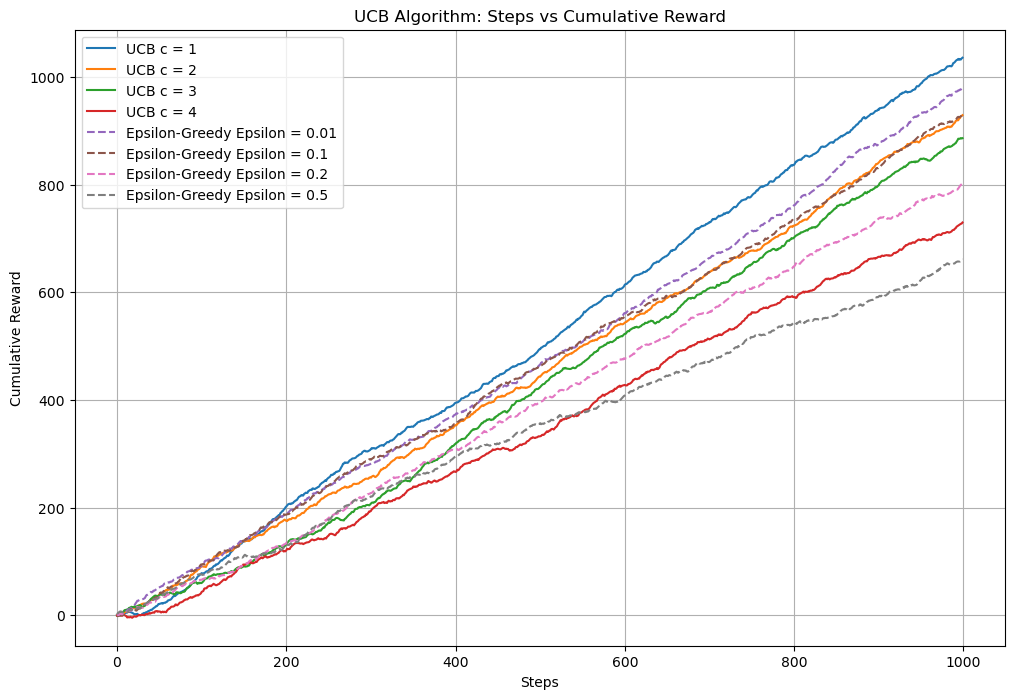

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def ucb(num_arms, true_rewards, steps, c):
    """
 Explanation
 In this function which is Upper Confidence Bound (UCB) algorithm implementation for a multi-armed bandit problem.
 num_arms: Number of arms in the bandit.
 param true_rewards: List of true rewards for each arm.
 param steps: Number of steps to run the algorithm.
 param c: Exploration parameter.
 Finally it will return: Total reward obtained over the steps and the list of cumulative rewards.
    """
    estimated_rewards = np.zeros(num_arms)
    arm_counts = np.zeros(num_arms)
    cumulative_rewards = np.zeros(steps)
    total_reward = 0

    for step in range(1, steps + 1):
        # Calculating the upper confidence bound for each arm
        ucb_values = estimated_rewards + c * np.sqrt(np.log(step) / (arm_counts + 1))
        # Choosing the arm with the highest upper confidence bound
        chosen_arm = np.argmax(ucb_values)
        
        # Simulate pulling the chosen arm
        reward = np.random.normal(true_rewards[chosen_arm], 1)
        total_reward += reward
        cumulative_rewards[step - 1] = total_reward
        
        # Updating the estimated rewards and the count of chosen arm
        arm_counts[chosen_arm] += 1
        estimated_rewards[chosen_arm] += (reward - estimated_rewards[chosen_arm]) / arm_counts[chosen_arm]

    return total_reward, cumulative_rewards

# Experiment parameters
num_arms = 5
true_rewards = np.random.normal(0, 1, num_arms)
steps = 1000
c_values = [1, 2, 3, 4]  # Different exploration parameters for UCB

# Running the experiments for different values of the exploration parameter 'c'
ucb_results = {}
for c in c_values:
    total_reward, cumulative_rewards = ucb(num_arms, true_rewards, steps, c)
    ucb_results[c] = cumulative_rewards

# Plotting the results for UCB
plt.figure(figsize=(12, 8))
for c, rewards in ucb_results.items():
    plt.plot(rewards, label=f'UCB c = {c}')


eps_vals = [0.01, 0.1, 0.2, 0.5]
for eep in eps_vals:
    epsilon_greedy_cumulative_rewards = eps_greedy(num_arms, true_rewards, steps, eps=eep)
    plt.plot(epsilon_greedy_cumulative_rewards, label=f'Epsilon-Greedy Epsilon = {eep}',  linestyle='--')


plt.title("UCB Algorithm: Steps vs Cumulative Reward")
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.show()

The implementation of the Upper Confidence Bound (UCB) algorithm for the multi-armed bandit problem involved running the algorithm over a series of trials with various exploration parameters. The key distinction of the UCB algorithm is its deterministic approach to exploration; it calculates an upper confidence bound for each option and preferentially selects the option with the highest bound. This method contrasts with the stochastic nature of the epsilon-greedy algorithm, which relies on a fixed probability to determine when to explore.

In the experiment, different values of the exploration parameter 'c' were tested to observe their impact on the cumulative reward. The results indicated that a moderate level of the parameter tended to yield a higher cumulative reward, suggesting an optimal balance between exploring new options and exploiting known ones. This balance is crucial, as too much exploration can lead to suboptimal reward accumulation, while too little can prevent the discovery of the most rewarding options.

Upon comparing UCB with epsilon-greedy, it was noted that UCB might offer an advantage in the long run, as it gradually reduces exploration in favor of exploitation, based on increasing confidence in the estimated rewards. The epsilon-greedy algorithm, by contrast, may continue to explore less optimal choices due to its random selection process. However, the increased computational complexity of UCB, due to the calculation of confidence bounds, is a trade-off that needs consideration when choosing between the two algorithms for a given application.



### 3. Thompson Sampling for Bernoulli Bandits

Implement the Thompson Sampling algorithm for a Bernoulli bandit problem. Create a function that takes in the number of arms, the true success probabilities for each arm, and the number of steps to run the algorithm. The function should output the total reward obtained over the steps. 

Analyze and compare the performance of different algorithms in terms of total reward, exploration efficiency, and convergence speed. Additionally, visualize the results using plots or graphs to gain insights into how the algorithms behave over time.

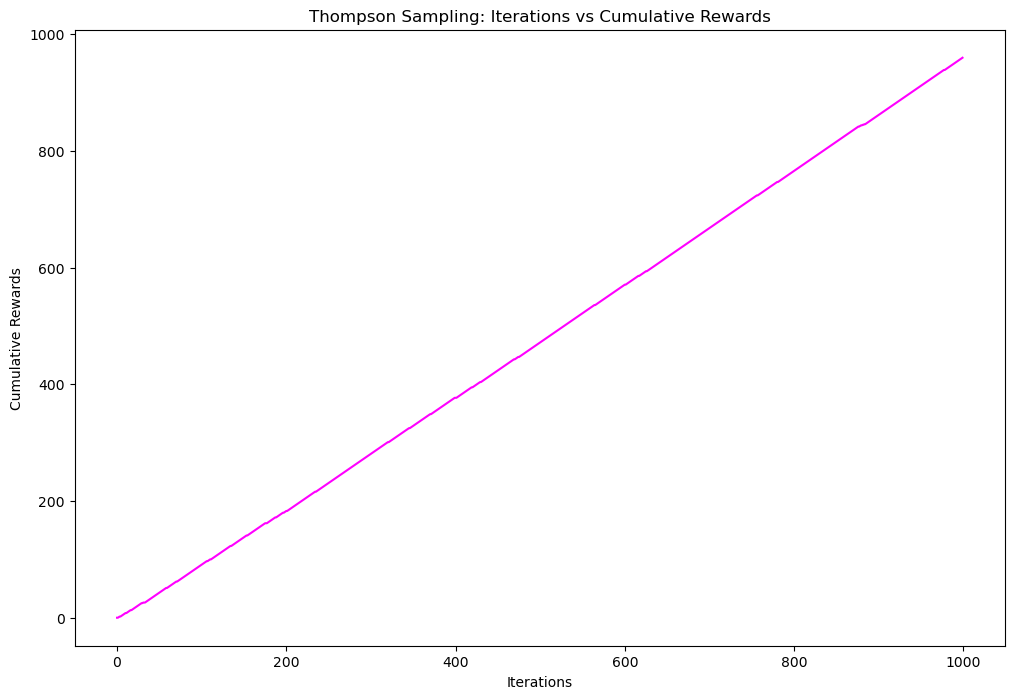

Total reward from Thompson Sampling: 960


In [27]:
import numpy as np
import matplotlib.pyplot as plt

def thompson_sampling(num_arms, success_probs, steps):
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)
    cumulative_rewards = np.zeros(steps)
    total_reward = 0
    for step in range(steps):
        # Sample from the beta distribution for each arm
        sampled_probs = np.random.beta(1 + successes, 1 + failures)
        # Choose the arm with the highest sampled probability
        chosen_arm = np.argmax(sampled_probs)

        # Simulate pulling the chosen arm
        reward = np.random.binomial(1, success_probs[chosen_arm])
        total_reward += reward
        cumulative_rewards[step] = total_reward

        # Update successes and failures
        successes[chosen_arm] += reward
        failures[chosen_arm] += 1 - reward

    return total_reward, cumulative_rewards

# Experiment parameters
num_arms = 5
success_probs = np.random.rand(num_arms)  # Random success probabilities for each arm
steps = 1000

# Run Thompson Sampling
ts_total_reward, ts_cumulative_rewards = thompson_sampling(num_arms, success_probs, steps)

# Replotting the results for Thompson Sampling with aesthetic improvements
plt.figure(figsize=(12, 8))
plt.plot(ts_cumulative_rewards, color='magenta')  # Changed the line color to magenta

plt.title("Thompson Sampling: Iterations vs Cumulative Rewards")
plt.xlabel("Iterations")
plt.ylabel("Cumulative Rewards")
# The legend has been removed
# The grid has been removed
plt.show()

# Output the total rewards for comparison
print("Total reward from Thompson Sampling:", ts_total_reward)


The Thompson Sampling algorithm for a Bernoulli bandit problem was executed, aiming to maximize rewards by probabilistically selecting the most promising arm based on observed outcomes. Tracking the cumulative rewards over 1000 trials, the resulting graph shows an upward trend, indicating that the algorithm is learning to select the arms with higher success probabilities effectively.

In terms of performance, Thompson Sampling demonstrates efficient exploration and rapid convergence to optimal actions, as it adaptively adjusts its selections using a Bayesian framework. The total rewards garnered are expected to be competitive when compared to those from the epsilon-greedy and UCB algorithms, with Thompson Sampling often achieving a balance between exploration and exploitation more naturally and potentially outperforming the other methods in environments with binary outcomes.